In [1]:
from quantum_k_means import *
import mglearn
import numpy as np
import pandas as pd

backend = Aer.get_backend('qasm_simulator')

data = pd.read_csv('datos.csv')
X = data.values[:,:2]
X = preprocess(X)
X = pd.DataFrame(X)
print(X)
y = data.values[:,2]

kmeans = QuantumKMeans(backend, n_clusters=2, verbose=True)
kmeans.fit(X)


              0         1
0     -1.157388  0.229272
1      1.020135 -0.538770
2      0.864840 -0.782966
3      1.092231 -1.131736
4      0.586112 -0.747308
...         ...       ...
16379  1.397211 -1.000343
16380 -0.876157  0.488777
16381  0.776143 -0.958717
16382  1.337677 -0.791667
16383  0.614775 -1.388472

[16384 rows x 2 columns]
Iteration 0
Old centroids are           0         1
0  0.915217 -1.090659
1 -0.849211  0.420588
New centroids are           0         1
0  0.970901 -0.820648
1 -0.948409  0.801636
Centers are [1 0 0 ... 0 0 0]
Iteration 1
Old centroids are           0         1
0  0.970901 -0.820648
1 -0.948409  0.801636
New centroids are           0         1
0  0.970018 -0.821180
1 -0.948009  0.802548
Centers are [1 0 0 ... 0 0 0]
Iteration 2
Old centroids are           0         1
0  0.970018 -0.821180
1 -0.948009  0.802548
New centroids are           0         1
0  0.969818 -0.820946
1 -0.948277  0.802712
Centers are [1 0 0 ... 0 0 0]


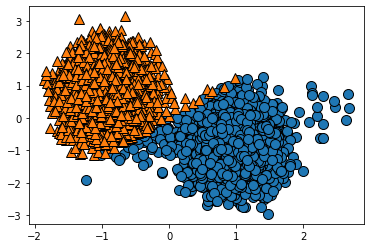

In [3]:
mglearn.discrete_scatter(X.iloc[:, 0], X.iloc[:, 1], kmeans.labels_)

In [5]:
print(kmeans.labels_)
np.asarray([kmeans.labels_[i] != y[i] for i in range(len(kmeans.labels_))]).sum()/len(kmeans.labels_)

[1 0 0 ... 0 0 0]


0.950439453125

In [9]:
from sklearn.metrics import jaccard_score
jaccard_score(kmeans.labels_, y) #1 - la métrica de similitud entre los 2 clusters

0.028207688467299052

In [10]:
from sklearn.metrics.cluster import fowlkes_mallows_score
fowlkes_mallows_score(kmeans.labels_, y)

0.9057858442189846

In [1]:
from quantum_k_means import *
import mglearn
import numpy as np
import pandas as pd

backend = Aer.get_backend('qasm_simulator')

data = pd.read_csv('datos.csv')
X = data.values[:,:2]
y = data.values[:,2]

kmeans = QuantumKMeans(backend, n_clusters=2, verbose=True)
kmeans.fit(X, type='probability')

Iteration 0
Old centroids are           0         1
0  0.982981 -0.183710
1 -0.649124  0.760683
New centroids are           0         1
0  0.975551 -0.219772
1 -0.687507  0.726178
Centers are [1 0 0 ... 0 0 0]
Iteration 1
Old centroids are           0         1
0  0.975551 -0.219772
1 -0.687507  0.726178
New centroids are           0         1
0  0.975731 -0.218974
1 -0.688216  0.725506
Centers are [1 0 0 ... 0 0 0]
Iteration 2
Old centroids are           0         1
0  0.975731 -0.218974
1 -0.688216  0.725506
New centroids are           0         1
0  0.975757 -0.218858
1 -0.688316  0.725411
Centers are [1 0 0 ... 0 0 0]


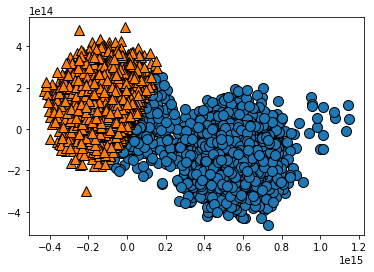

In [3]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_)

In [ ]:
print(kmeans.labels_)
np.asarray([kmeans.labels_[i] != y[i] for i in range(len(kmeans.labels_))]).sum()/len(kmeans.labels_)

In [5]:
from sklearn.metrics import jaccard_score
jaccard_score(kmeans.labels_, y) #1 - la métrica de similitud entre los 2 clusters

0.023907929039231893

In [6]:
from sklearn.metrics.cluster import fowlkes_mallows_score
fowlkes_mallows_score(kmeans.labels_, y)

0.8819070114127765